# NASA's Battery Ageing Testing (Time-Series Dataset)

This version is created on Sep 12 2020 by Dr. Zhe Liu from Massachussets Institute of Technology, following the guide from NASA's dataset instruction.

### Data download 

- Download data from NASA repository https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#batteryrnddischarge, download dataset 1. 

- Or, the direct download link at https://ti.arc.nasa.gov/m/project/prognostic-repository/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post.zip


### Experiment Description
A set of four 18650 Li-ion batteries (Identified as RW9, RW10, RW11 and RW12) were continuously operated using a sequence of charging and discharging currents between -4.5A and 4.5A. This type of charging and discharging operation is referred to here as random walk (RW) operation. Each of the loading periods lasted 5 minutes, and after 1500 periods (about 5 days) a series of reference charging and discharging cycles were performed in order to provide reference benchmarks for battery state health.

This JN explains the structure of the battery data sets. Analysis of a similar dataset is published in:

Brian Bole, Chetan Kulkarni, and Matthew Daigle, “Adaptation of an Electrochemistry-based Li-Ion Battery Model to Account for Deterioration Observed Under Randomized Use”, in the proceedings of the Annual Conference of the Prognostics and Health Management Society, 2014.



### Import packages and load data

In [176]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [447]:
filename = './data/Matlab/RW10.mat'#change the file directory when necessary
f = loadmat(filename)
print(list(f.keys()))
data = f['data']['step'][0,0]

['__header__', '__version__', '__globals__', 'data']


### Data structure

The top level of this structure contains 3 fields:

1. procedure (A string naming the experimental procedure)
2. description (A more detailed text description of the experimental procedure)
3. step (An array of structs containing cycling data)

Within the step array you will find a struct with the following fields:

1. comment (string description of step)
2. type (one character identifier of step: ‘C’ = Charging, ‘D’ = Discharging, ‘R’ = Resting (current = 0))
3. relativeTime (vector of sample time in seconds, referenced to the beginning of the current step)
4. time (vector of sample time in seconds, referenced to the beginning of the experiment)
5. voltage (vector of sample voltage in units of Volts)
6. current (vector of sample current in units of Amps)
7. temperature (vector of sample temperature in units of degrees C)
8. date (date and time at which the current step was started in dd-Mon-yyyy HH:MM:SS format)

### First, we show an example of the low current discharge data


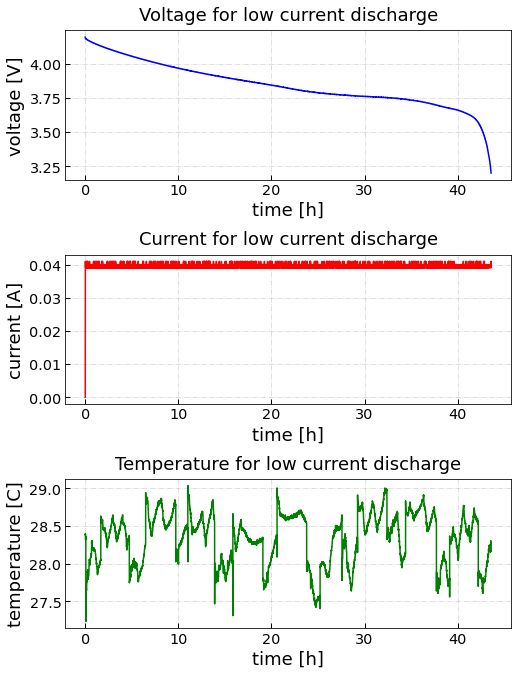

In [429]:
ind_sel = data['comment']=='low current discharge at 0.04A' # selection criteria
RT = data[ind_sel]['relativeTime']/3600
V = data[ind_sel]['voltage']
I = data[ind_sel]['current']
T = data[ind_sel]['temperature']

example_ind = 0
RT_exmpl = RT[example_ind][0]
V_exmpl = V[example_ind][0]
I_exmpl = I[example_ind][0]
T_exmpl = T[example_ind][0]


fig, ax = plt.subplots(3,1, figsize = (8, 11), sharex= False)
fs = 18
ax[0].plot(RT_exmpl,V_exmpl , color = 'blue')
ax[0].set_xlabel('time [h]', fontsize = fs)
ax[0].set_ylabel('voltage [V]', fontsize = fs)
ax[0].set_title('Voltage for low current discharge', fontsize = fs, pad = 10)


ax[1].plot(RT_exmpl,I_exmpl, color = 'red')
ax[1].set_xlabel('time [h]', fontsize = fs)
ax[1].set_ylabel('current [A]', fontsize = fs)
ax[1].set_title('Current for low current discharge', fontsize = fs, pad = 10)

ax[2].plot(RT_exmpl,T_exmpl, color = 'green')
ax[2].set_xlabel('time [h]', fontsize = fs)
ax[2].set_ylabel('temperature [C]', fontsize = fs)
ax[2].set_title('Temperature for low current discharge', fontsize = fs, pad = 10)


for i in range(len(ax)):
    ax[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax[i].grid(True, linestyle='-.')

plt.subplots_adjust(hspace = 0.5)
plt.show()


### Next, check out the random walk operations (i.e., randomized charging and discharging cycles)
- to model the realistic battery cycling/aging

In [408]:
ind_sel_1 = data['comment']=='discharge (random walk)' # selection criteria
ind_sel_2 = data['comment']=='rest (random walk)' # selection criteria
ind_sel_3 = data['comment']=='charge (random walk)'

ind_rw = []
for i in np.arange(len(data[0])-1)+1:
    if ind_sel_1[0][i] == True or ind_sel_2[0][i] == True or ind_sel_3[0][i] == True:
        # if just starting the pulsed load cycle
        ind_rw.append(i)


##### First 50 cycles

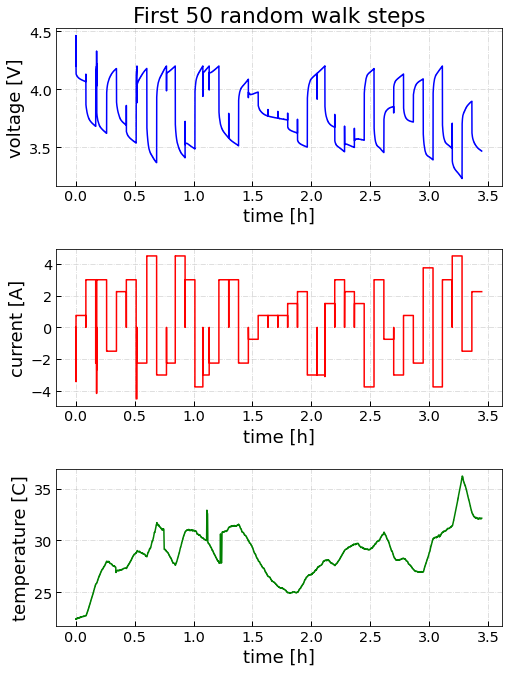

In [421]:
rw_cycle = ind_rw[0:100]# 50 discharging steps + 50 rest steps
fig, ax = plt.subplots(3, 1, figsize = (8, 11))
last_time = 0
relative_time = []
for i in range(len(rw_cycle)):
    RT = (data[0][rw_cycle[i]]['relativeTime']/3600)[0]+last_time
    last_time = RT[-1]
    relative_time.append(RT)

relative_time = np.concatenate(relative_time, axis = 0)
voltage = np.concatenate(data[0][rw_cycle]['voltage'],axis = 1)[0]
current = np.concatenate(data[0][rw_cycle]['current'],axis = 1)[0]
temperature = np.concatenate(data[0][rw_cycle]['temperature'],axis = 1)[0]


ax[0].plot(relative_time, voltage, c = 'blue')
ax[0].set_xlabel('time [h]', fontsize = fs)
ax[0].set_ylabel('voltage [V]', fontsize = fs)
ax[0].set_title('First 50 random walk steps', fontsize = 1.2*fs)
ax[1].plot(relative_time, current, c = 'red')
ax[1].set_xlabel('time [h]', fontsize = fs)
ax[1].set_ylabel('current [A]', fontsize = fs)

ax[2].plot(relative_time, temperature, c = 'green')
ax[2].set_xlabel('time [h]', fontsize = fs)
ax[2].set_ylabel('temperature [C]', fontsize = fs)
for i in range(len(ax)):
    ax[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax[i].grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.4)
plt.show()

##### Last 50 cycles

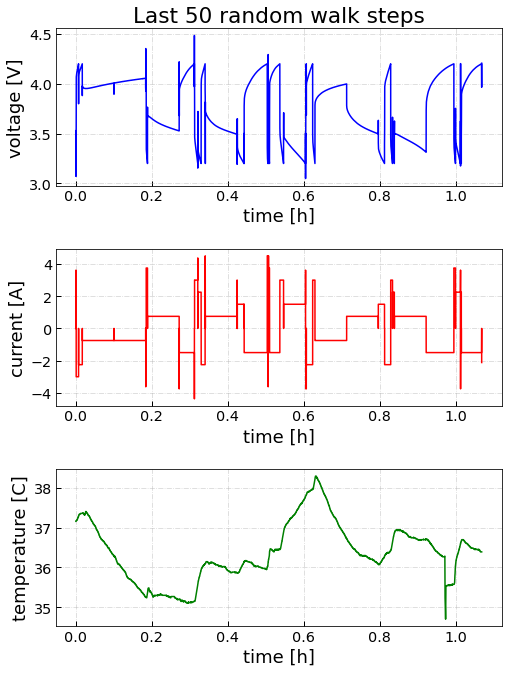

In [422]:
rw_cycle = ind_rw[-100:] # 50 discharging steps + 50 rest steps
fig, ax = plt.subplots(3, 1, figsize = (8, 11))
last_time = 0
relative_time = []
for i in range(len(rw_cycle)):
    RT = (data[0][rw_cycle[i]]['relativeTime']/3600)[0]+last_time
    last_time = RT[-1]
    relative_time.append(RT)

relative_time = np.concatenate(relative_time, axis = 0)
voltage = np.concatenate(data[0][rw_cycle]['voltage'],axis = 1)[0]
current = np.concatenate(data[0][rw_cycle]['current'],axis = 1)[0]
temperature = np.concatenate(data[0][rw_cycle]['temperature'],axis = 1)[0]

ax[0].plot(relative_time, voltage, c = 'blue')
ax[0].set_xlabel('time [h]', fontsize = fs)
ax[0].set_ylabel('voltage [V]', fontsize = fs)
ax[0].set_title('Last 50 random walk steps', fontsize = 1.2*fs)

ax[1].plot(relative_time, current, c = 'red')
ax[1].set_xlabel('time [h]', fontsize = fs)
ax[1].set_ylabel('current [A]', fontsize = fs)

ax[2].plot(relative_time, temperature, c = 'green')
ax[2].set_xlabel('time [h]', fontsize = fs)
ax[2].set_ylabel('temperature [C]', fontsize = fs)
for i in range(len(ax)):
    ax[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax[i].grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.4)
plt.show()

### Then, check the reference discharge cycles (i.e., contant load discharging) over time
- the constant load profiles are run after every 50 random walk
- the battery’s capacity by integrating current over the reference cycles

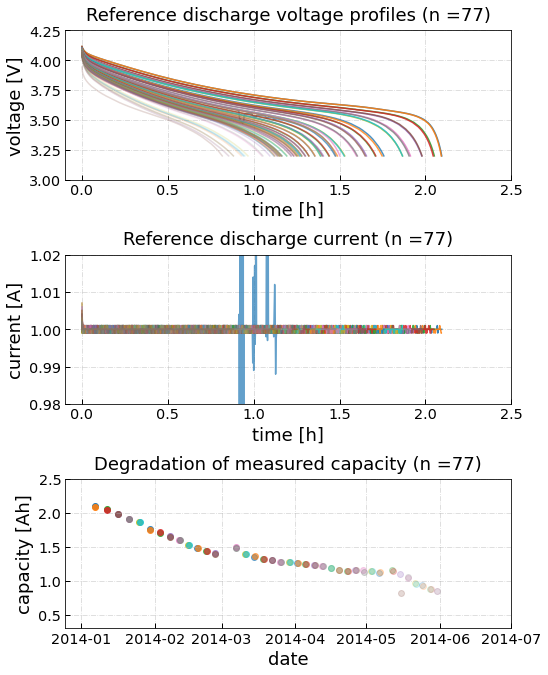

In [437]:
ind_sel = data['comment']=='reference discharge' # selection criteria
RT = data[ind_sel]['relativeTime']/3600
V = data[ind_sel]['voltage']
I = data[ind_sel]['current']
date = [datetime.datetime.strptime(dstr[0], '%d-%b-%Y %H:%M:%S') for dstr in data[ind_sel]['date']]

fig, ax = plt.subplots(3,1, figsize = (8, 11), sharex= False)
fs = 18
for ind in range(len(RT)-1):
    ax[0].plot(RT[ind][0],V[ind][0], alpha = 0.1+0.8*(1-ind/len(RT)), linestyle = '-')
    ax[1].plot(RT[ind][0],I[ind][0], alpha = 0.1+0.8*(1-ind/len(RT)), linestyle = '-')
    ax[2].scatter(date[ind],np.trapz(I[ind][0], RT[ind][0]), alpha = 0.1+0.8*(1-ind/len(RT)))
    #ax[1].plot(RT[ind][0],I[ind][0], alpha = 0.9, linestyle = '-')
    
ax[0].set_xlabel('time [h]', fontsize = fs)
ax[0].set_ylabel('voltage [V]', fontsize = fs)
ax[0].set_title('Reference discharge voltage profiles (n ='+str(len(RT))+')', fontsize = fs, pad = 10)
ax[0].set_xlim([-.1, 2.5])
ax[0].set_ylim([  3, 4.25])


ax[1].set_xlabel('time [h]', fontsize = fs)
ax[1].set_ylabel('current [A]', fontsize = fs)
ax[1].set_title('Reference discharge current (n ='+str(len(RT))+')', fontsize = fs, pad = 10)
ax[1].set_xlim([-.1, 2.5])
ax[1].set_ylim([  0.98, 1.02])

ax[2].set_xlabel('date', fontsize = fs)
ax[2].set_ylabel('capacity [Ah]', fontsize = fs)
ax[2].set_title('Degradation of measured capacity (n ='+str(len(RT))+')', fontsize = fs, pad = 10)
ax[2].set_xlim([np.datetime64('2013-12-25'), np.datetime64('2014-07')])
ax[2].set_ylim([  0.3, 2.5])

for i in range(len(ax)):
    ax[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax[i].grid(True, linestyle='-.')
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Lastly, pulse discharge cycles (i.e., transient load)
- the pulsed load charging and discharging cycles that are run after every 3000 RW steps.



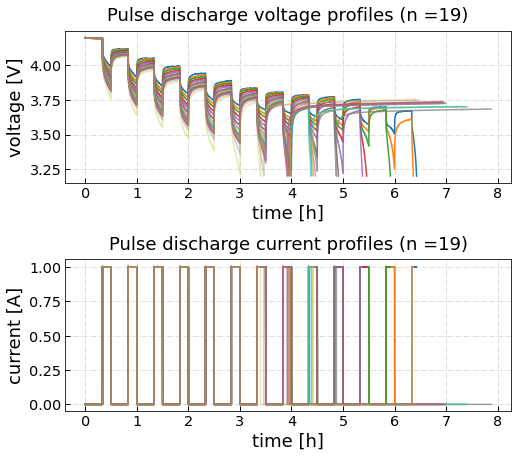

In [451]:
ind_sel_1 = data['comment']=='pulsed load (discharge)' # selection criteria
ind_sel_2 = data['comment']=='pulsed load (rest)' # selection criteria
ind_sel_3 = data['comment']=='rest post pulsed load or charge'

ind_start = []
ind_subseq = []
ind_end = []
ind_pulse = []
for i in np.arange(len(data[0])-1)+1:
    
    if ind_sel_1[0][i] == True or ind_sel_2[0][i] == True:
        # if just starting the pulsed load cycle
        ind_pulse.append(i)

        if ind_sel_2[0][i] == True and ind_sel_1[0][i-1] == False:
            ind_start.append(i)
        else:
            ind_subseq.append(i)
    if ind_sel_3[0][i] == True:
        #check to see if this preceeds a pulsed load (discharge)
        if ind_sel_1[0][i-1] == True:
            ind_end.append(i) 
            ind_pulse.append(i)

temp = []
cycle_list = []
for i in range(len(ind_pulse[1:])): 
    if ind_pulse[i]-ind_pulse[i-1]>1:
        cycle_list.append(temp)
        temp = [ind_pulse[i]]
    else:
        temp.append(ind_pulse[i])
        
        
# making the plot with the corrected time       
fig, ax = plt.subplots(2, 1, figsize = (8, 7))
for i in range(len(cycle_list)):
    last_time = 0
    relative_time = []
    for j in range(len(cycle_list[i])):
        RT = (data[0][cycle_list[i][j]]['relativeTime']/3600)[0] + last_time
        last_time = RT[-1]
        relative_time.append(RT)
    relative_time = np.concatenate(relative_time, axis = 0)
    voltage = np.concatenate(data[0][cycle_list[i]]['voltage'],axis = 1)[0]
    current = np.concatenate(data[0][cycle_list[i]]['current'],axis = 1)[0]

    ax[0].plot(relative_time, voltage,  alpha = 0.3+0.7*(1-i/len(cycle_list)))
    ax[1].plot(relative_time, current,  alpha = 0.3+0.7*(1-i/len(cycle_list)))

ax[0].set_title('Pulse discharge voltage profiles (n ='+str(len(cycle_list))+')', fontsize = fs, pad = 10)
ax[0].set_xlabel('time [h]', fontsize = fs)
ax[0].set_ylabel('voltage [V]', fontsize = fs)

ax[1].set_title('Pulse discharge current profiles (n ='+str(len(cycle_list))+')', fontsize = fs, pad = 10)
ax[1].set_xlabel('time [h]', fontsize = fs)
ax[1].set_ylabel('current [A]', fontsize = fs)


for i in range(len(ax)):
    ax[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax[i].grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.5)
plt.show()